# **Image Preprocessing**

### Import ImageDataGenerator Library And Configure It

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)


In [ ]:
import tensorflow as tf
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from PIL import Image
import pathlib

##Apply ImageDataGenerator Functionality To Train And Test Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Training Dataset
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/Dataset/training_set',target_size=(64,64), class_mode='categorical',batch_size=900,color_mode = "grayscale")
# Testing Dataset
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/Dataset/test_set',target_size=(64,64), class_mode='categorical',batch_size=900,color_mode = "grayscale")


Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


In [ ]:
x = (15750+2250)//900
x

20

In [ ]:
print("Len x-train : ",len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  18
Len x-test :  3


In [ ]:
# The Class Indices in Training Dataset
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [ ]:
# The Class Indices in Test Dataset
x_test.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

#**Model building**

##Import The Required Model Building Libraries

In [ ]:
# Importing Libraries
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

##Initialize The Model

In [ ]:
# Creating Model
model=Sequential()

##Add The Convolution Layer

In [ ]:
# Adding The Convolution Layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))

##Add The Pooling Layer

In [ ]:
# Adding The Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

##Add The Flatten Layer

In [ ]:
# Adding The Flatten Layer
model.add(Flatten())

## Add the Dense Layers

In [ ]:
# Adding Dense Layers
model.add(Dense(512,activation='relu'))
model.add(Dense(9,activation='softmax'))

## Compilie the Model

In [ ]:
# Compiling the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

##Fit And Save The Model

In [ ]:
# Fitting the Model Generator
model.fit(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
18/18 [==============================] - 2135s 119s/step - loss: 1.4358 - accuracy: 0.6285 - val_loss: 0.4318 - val_accuracy: 0.8804
Epoch 2/10
18/18 [==============================] - 82s 4s/step - loss: 0.3189 - accuracy: 0.9081 - val_loss: 0.3124 - val_accuracy: 0.9280
Epoch 3/10
18/18 [==============================] - 81s 4s/step - loss: 0.1491 - accuracy: 0.9597 - val_loss: 0.2400 - val_accuracy: 0.9547
Epoch 4/10
18/18 [==============================] - 82s 4s/step - loss: 0.0918 - accuracy: 0.9772 - val_loss: 0.2035 - val_accuracy: 0.9600
Epoch 5/10
18/18 [==============================] - 87s 5s/step - loss: 0.0605 - accuracy: 0.9858 - val_loss: 0.1879 - val_accuracy: 0.9724
Epoch 6/10
18/18 [==============================] - 84s 5s/step - loss: 0.0398 - accuracy: 0.9910 - val_loss: 0.2023 - val_accuracy: 0.9702
Epoch 7/10
18/18 [==============================] - 81s 4s/step - loss: 0.0307 - accuracy: 0.9935 - val_loss: 0.2152 - val_accuracy: 0.9640
Epoch 8/10
18/18

In [ ]:
# Saving The Model
model.save('/content/drive/MyDrive/final model/aslpng1.h5')

#Test The Model


##Import The Packages And Load The Saved Model

In [ ]:
import numpy as np
from keras.models import load_model
import cv2

In [ ]:
model=load_model('/content/drive/MyDrive/final model/aslpng1.h5')

##Load The Test Image, Pre-Process It And Predict

In [49]:
from skimage.transform import resize
def detect(frame):
  img = resize(frame, (64,64,1))
  img = np.expand_dims(img,axis=0)
  if(np.max(img)>1):
    img = img/255.0
  prediction = model.predict(img)
  predictions = np.argmax(model.predict(img),axis=1)
  print(prediction)
  print(predictions)
  predicted = list(predictions)
  index=['A','B','C','D','E','F','G','H','I']
  print(index[predicted[0]])


In [66]:
frame = cv2.imread(r"/content/drive/MyDrive/Dataset/Dataset/test_set/D/100.png")
data = detect(frame)

1/1 [==============================] - 0s 39ms/step
[[0.09182831 0.09003803 0.139085   0.14520077 0.10619249 0.11541776
  0.10172331 0.10190983 0.10860445]]
[3]
D


##OPEN CV


In [51]:
import cv2

In [67]:
img=cv2.imread(r'/content/drive/MyDrive/Dataset/Dataset/test_set/D/100.png')

In [68]:
print(img.shape)

(64, 64, 3)


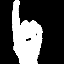

In [69]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()